# Parkinson disease detection using XGboost

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\IRFAN\OneDrive\Documents\project\New folder\parkinsons.csv')
display(df.head())

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Shape of the DataFrame: (195, 24)

Missing values per column:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Data types of each column:
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:

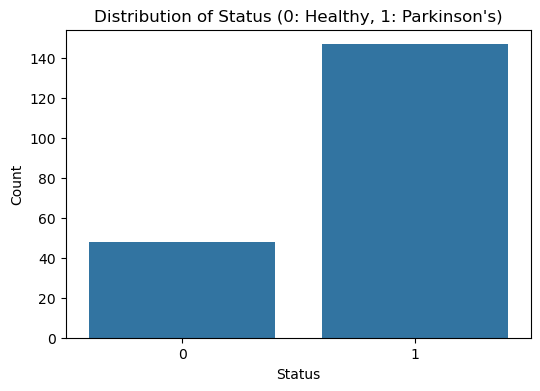

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Shape of the DataFrame: {df.shape}")

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

status_counts = df['status'].value_counts()
print("\nDistribution of the target variable 'status':")
print(status_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df)
plt.title('Distribution of Status (0: Healthy, 1: Parkinson\'s)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


Correlation between features and the target variable 'status':
MDVP:Fo(Hz)        -0.383535
MDVP:Fhi(Hz)       -0.166136
MDVP:Flo(Hz)       -0.380200
MDVP:Jitter(%)      0.278220
MDVP:Jitter(Abs)    0.338653
MDVP:RAP            0.266668
MDVP:PPQ            0.288698
Jitter:DDP          0.266646
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
NHR                 0.189429
HNR                -0.361515
RPDE                0.308567
DFA                 0.231739
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64


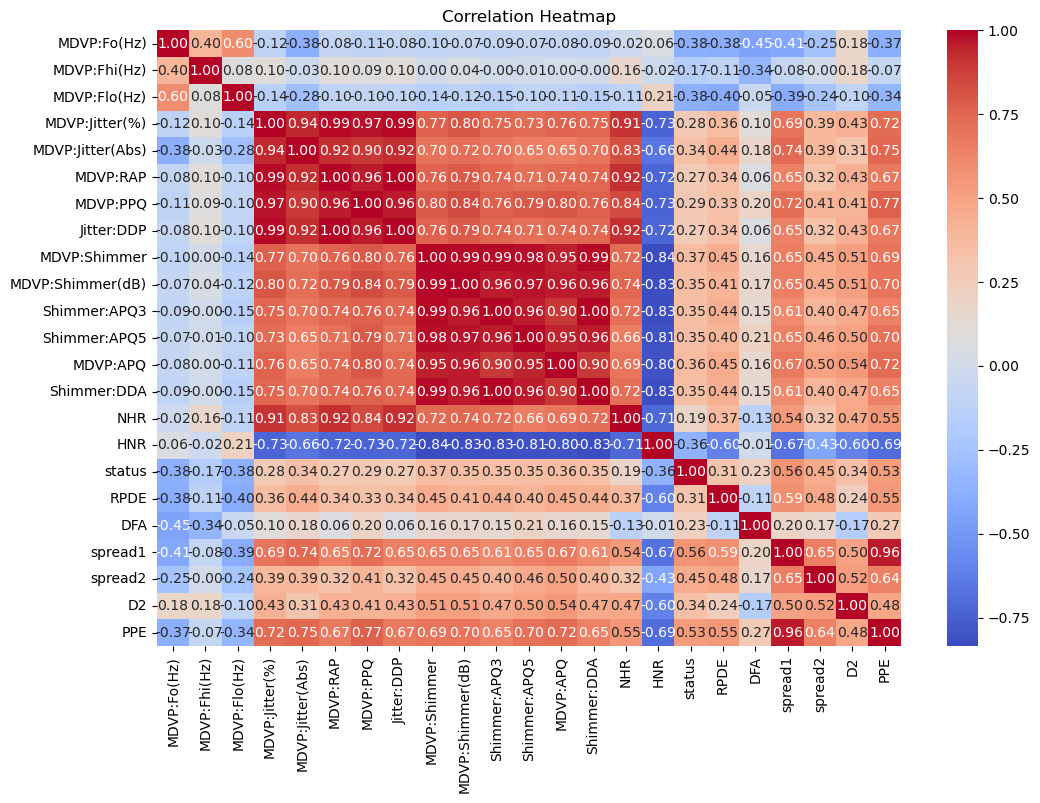

In [3]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['status'].drop('status')
print("\nCorrelation between features and the target variable 'status':")
print(correlations)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(['status', 'name'], axis=1)
y = df['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled['name'] = df['name'] # adding back the 'name' column

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
import xgboost

model = xgboost.XGBClassifier()

model.fit(X_train.drop('name', axis=1), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
)

grid_search.fit(X_train.drop('name', axis=1), y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Accuracy: 0.9230769230769231
Precision: 0.9393939393939394
Recall: 0.96875
F1-score: 0.9538461538461539
AUC-ROC: 0.8415178571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



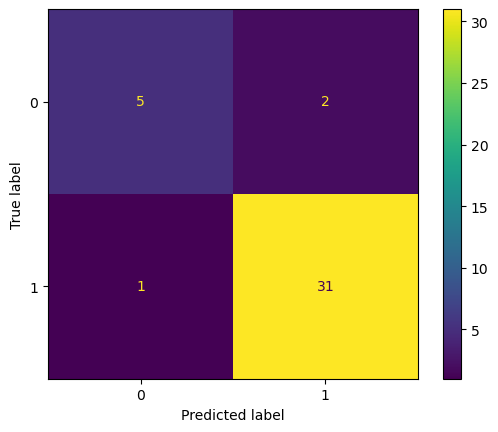

In [7]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test.drop('name', axis=1))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [8]:
import numpy as np
import pandas as pd

def preprocess_new_data(new_data):
    """Preprocesses new voice data for Parkinson's disease prediction.

    Args:
        new_data: A pandas DataFrame representing new voice data.

    Returns:
        A NumPy array representing the preprocessed data.
    """

    if 'name' in new_data.columns:
        new_data = new_data.drop('name', axis=1)

    scaled_data = scaler.transform(new_data)

    return scaled_data

In [9]:
new_voice_data = pd.DataFrame({
    'MDVP:Fo(Hz)': [119.992],
    'MDVP:Fhi(Hz)': [157.302],
    'MDVP:Flo(Hz)': [74.997],
    'MDVP:Jitter(%)': [0.00784],
    'MDVP:Jitter(Abs)': [0.00007],
    'MDVP:RAP': [0.0037],
    'MDVP:PPQ': [0.00554],
    'Jitter:DDP': [0.01109],
    'MDVP:Shimmer': [0.04374],
    'MDVP:Shimmer(dB)': [0.426],
    'Shimmer:APQ3': [0.02182],
    'Shimmer:APQ5': [0.0313],
    'MDVP:APQ': [0.02971],
    'Shimmer:DDA': [0.06545],
    'NHR': [0.02211],
    'HNR': [21.033],
    'RPDE': [0.414783],
    'DFA': [0.815285],
    'spread1': [-4.813031],
    'spread2': [0.266482],
    'D2': [2.301442],
    'PPE': [0.284654]
})

preprocessed_data = preprocess_new_data(new_voice_data)

prediction = best_model.predict(preprocessed_data)


In [10]:
if prediction == 1:
    print("The person has the symptoms of parkinson")
else:
    print("The person does not has the symptoms of parkinson")

The person has the symptoms of parkinson
